<a href="https://colab.research.google.com/github/khoa2210/Do-an-/blob/main/Th%E1%BB%91ng_k%C3%AA_suy_di%E1%BB%85n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pingouin import ancova

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Diet_R.csv to Diet_R.csv


In [5]:
df = pd.read_csv("Diet_R.csv")
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [7]:
df = df.drop([0, 1])
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [8]:
df = df.set_index('Person')
df = df.sort_index()
df

,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1
5,0,50,170,65,1,62.2
...,...,...,...,...,...,...
74,1,35,183,83,3,80.2
75,1,49,177,84,3,79.9
76,1,28,164,85,3,79.7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 1 to 78
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        76 non-null     object 
 1   Age           76 non-null     int64  
 2   Height        76 non-null     int64  
 3   pre.weight    76 non-null     int64  
 4   Diet          76 non-null     int64  
 5   weight6weeks  76 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 4.2+ KB


In [10]:
df.isna().any()

gender          False
Age             False
Height          False
pre.weight      False
Diet            False
weight6weeks    False
dtype: bool

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,76.0,39.223684,9.908379,16.0,32.50,39.00,47.250,60.0
Height,76.0,170.776316,11.419981,141.0,163.75,169.00,175.250,201.0
pre.weight,76.0,72.289474,7.974653,58.0,66.00,72.00,78.000,88.0
Diet,76.0,2.039474,0.823663,1.0,1.00,2.00,3.000,3.0
weight6weeks,76.0,68.343421,8.058938,53.0,61.95,68.95,73.675,84.5


Câu 1

Bỏ qua chế độ ăn kiêng và kiểm tra xem đã giảm cân chưa"

$H_0: u_0 = u_1$. Cân nặng trung bình của trước và sau khi giảm cân là như nhau 

$H_1: u_0 \# u_1$. Cân nặng trung bình của trước và sau khi giảm cân khác nhau

In [12]:
df[['pre.weight','weight6weeks']].describe().T

,count,mean,std,min,25%,50%,75%,max
pre.weight,76.0,72.289474,7.974653,58.0,66.00,72.00,78.000,88.0
weight6weeks,76.0,68.343421,8.058938,53.0,61.95,68.95,73.675,84.5


In [21]:
st,p = stats.ttest_ind(df['pre.weight'], df['weight6weeks'])
if p < 0.05:
  print("Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân là có sự khác biệt.")
else:
  print("Không đủ bằng chứng để bác bỏ giả thiết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân không có sự khác biệt")

Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân là có sự khác biệt.


Câu 2 

Loại bỏ trọng lượng đã mất và yêu cầu học sinh tính toán nó bằng cách sử dụng trọng lượng trước trừ sau

In [23]:
df['weightlost'] = df['pre.weight'] - df['weight6weeks']
df

,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
Person,,,,,,,
1,0,22,159,58,1,54.2,3.8
2,0,46,192,60,1,54.0,6.0
3,0,55,170,64,1,63.3,0.7
4,0,33,171,64,1,61.1,2.9
5,0,50,170,65,1,62.2,2.8
...,...,...,...,...,...,...,...
74,1,35,183,83,3,80.2,2.8
75,1,49,177,84,3,79.9,4.1
76,1,28,164,85,3,79.7,5.3


Câu 3

Thống kê tóm tắt theo chế độ ăn uống

In [24]:
pd.DataFrame(df['Diet'].describe().T)

,Diet
count,76.000000
mean,2.039474
std,0.823663
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


In [25]:
z = df.groupby('Diet')['Diet'].count()
z = pd.DataFrame(z)
z.columns = ['Frequency']
z['Percent'] = z/sum(z['Frequency'])*100
z

,Frequency,Percent
Diet,,
1,24,31.578947
2,25,32.894737
3,27,35.526316


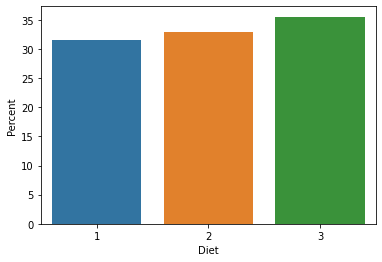

In [26]:
z.reset_index(inplace=True)

sns.barplot(x = 'Diet',
            y = 'Percent',
            data = z)
plt.show()

Câu 4 

Phương pháp giảm cân nhiều nhất 

Xây dựng giả thiết 

- $H_0: \mu_1 = \mu_2 = \mu_3$

- $H_1: \mu_i \neq \mu_j$ (i $\neq$ j ,  i, j $\in \overline{1,3}$)

In [27]:
task4 = df[['Diet', 'weightlost']]
task4

,Diet,weightlost
Person,,
1,1,3.8
2,1,6.0
3,1,0.7
4,1,2.9
5,1,2.8
...,...,...
74,3,2.8
75,3,4.1
76,3,5.3


In [30]:
diet = task4.groupby('Diet').groups
# Lấy giá trị tương ứng ở cột des_weight 
type_1 = df['weightlost'][diet[1]]
type_2 = df['weightlost'][diet[2]]
type_3 = df['weightlost'][diet[3]]

Phát biểu giả thiết:
Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa

Sử dụng Shapiro-Wilk test 

$H_0$: Phân phối của feature là chuẩn

$H_1$: Phân phối của feature là không chuẩn

In [38]:
st,p = stats.shapiro(type_1)
if p < 0.05:
  print("Phân phối của feature là không chuẩn")
else:
  print("Phân phối của diet loại 1 là chuẩn")

Phân phối của diet loại 1 là chuẩn


In [36]:
st,p = stats.shapiro(type_2)
if p < 0.05:
  print("Phân phối của feature là không chuẩn")
else:
  print("Phân phối của diet loại 2 là chuẩn")

Phân phối của diet loại 2 là chuẩn


In [37]:
st,p = stats.shapiro(type_3)
if p < 0.05:
  print("Phân phối của feature là không chuẩn")
else:
  print("Phân phối của diet loại 3 là chuẩn")

Phân phối của diet loại 3 là chuẩn


## Kiểm định tính thuần nhất phương sai (homogeneity of variance)

### Bartlett’s Test

Phát biểu các giả thiết:


$H_0$: Các feature đều có phương sai đồng nhất 

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai.

In [41]:
st,p = stats.bartlett(type_1,type_2,type_3)
if p < 0.05:
  print("Loại giả thiết H_0. Tức là các feature không đồng nhất về phương sai. ")
else:
  print("Các loại diet đều có phương sai đồng nhất")

Các loại diet đều có phương sai đồng nhất


#Phân tích Anova

In [44]:
st,p = stats.f_oneway(type_1, type_2, type_3)
if p < 0.05:
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không có sự khác biệt.')

Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt


#Hậu kiểm anova

In [50]:
tukey = pairwise_tukeyhsd(df['weightlost'],
                          df['Diet'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.032,0.9,-1.6531,1.5891,False
1,3,1.8481,0.0188,0.2567,3.4396,True
2,3,1.8801,0.0152,0.3057,3.4546,True


4.2 Có sự khác biệt về giới tính đối với việc giảm cân?

- Xây dựng giả thuyết 

$H_0:$ Khả năng giảm cân phụ thuộc vào giới tính

$H_0:$ Khả năng giảm cân không phụ thuộc vào giới tính

In [51]:
data = df[['gender', 'weightlost']]
data

,gender,weightlost
Person,,
1,0,3.8
2,0,6.0
3,0,0.7
4,0,2.9
5,0,2.8
...,...,...
74,1,2.8
75,1,4.1
76,1,5.3


In [52]:
gender = df.groupby('gender')['gender'].count()
gender = pd.DataFrame(gender)
gender.columns = ['Frequency']
gender['Percent'] = gender/sum(gender['Frequency'])*100
gender

,Frequency,Percent
gender,,
0,43,56.578947
1,33,43.421053


In [55]:
gr = data.groupby('gender').groups
female = data['weightlost'][gr['0']]
male = data['weightlost'][gr['1']]

## Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa

### Sử dụng Shapiro-Wilk test 

Phát biểu giả thiết:

$H_0$: Phân phối của feature là chuẩn

$H_1$: Phân phối của feature là không chuẩn

In [60]:
stat, p = stats.shapiro(male)
if p < 0.05:
  print("Phân phối của nam là không chuẩn")
else:
  print("Phân phối của nam là chuẩn")

Phân phối của nam là chuẩn


In [62]:
stat, p = stats.shapiro(female)
if p < 0.05:
  print("Phân phối của nữ là không chuẩn")
else:
  print("Phân phối của nữ là chuẩn")

Phân phối của nữ là chuẩn


Kiểm định tính thuần nhất phương sai (homogeneity of variance) 

Bartlett’s Test

Phát biểu các giả thiết:

H0 : Các feature đều có phương sai đồng nhất

H1 : Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 =  α  thì loại giả thiết  H0 . Tức là các feature không đồng nhất về phương sai.

In [68]:
st,p = stats.bartlett(male,female)
if p < 0.05:
  print("Loại giả thiết H_0. Tức là các feature không đồng nhất về phương sai. ")
else:
  print("Các loại diet đều có phương sai đồng nhất")

Các loại diet đều có phương sai đồng nhất


#Phân tích Anova

In [69]:
st,p = stats.f_oneway(male,female)
if p < 0.05:
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có ảnh hưởng bởi giới tính')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không ảnh hưởng bởi giới tính.')

0.8348273886348012

#Hậu Anova

In [70]:
tukey = pairwise_tukeyhsd(endog=df['weightlost'],
                          groups=df['gender'],
                          alpha=0.05)
tukey.summary()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.1221,0.8397,-1.0408,1.2851,False


#Câu 5
### Ảnh hưởng của chế độ ăn kiêng và giới tính đến việc giảm cân

In [71]:
model = ols('weightlost ~ C(Diet) + C(gender) + C(Diet):C(gender)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Diet),60.417220,2.0,5.619026,0.005456
C(gender),0.168696,1.0,0.031379,0.859910
C(Diet):C(gender),33.904068,2.0,3.153204,0.048842
Residual,376.329043,70.0,NaN,NaN


#Câu 6 

##Tương tác
###Biểu đồ giảm cân theo chế độ ăn uống và giới tính

In [76]:
cau6 = df[['gender','Diet','weightlost']]
cau6['gender'] = cau6['gender'].replace(to_replace =['0' ,'1'], 
                            value =['Female','Male'])
cau6.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gender,Diet,weightlost
Person,,,
57,Female,3,5.4
30,Female,2,4.3
67,Male,3,2.5
18,Male,1,4.1
31,Female,2,7.0
41,Male,2,4.2
15,Male,1,-0.6
27,Female,2,-2.1
28,Female,2,2.0


Text(0.5, 1.0, 'Biểu đồ thể hiện loại ăn kiêng và số cân giảm theo giới tính')

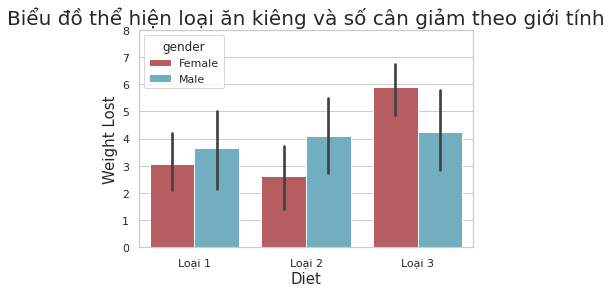

In [83]:
g=sns.barplot(x="Diet", y="weightlost", hue="gender", data=cau6, palette=['r','c'])
g.set_xticklabels(["Loại 1", "Loại 2", "Loại 3"])
g.set(ylim=(0, 8))
plt.ylabel('Weight Lost',size=15)
plt.xlabel('Diet', size=15)
plt.title('Biểu đồ thể hiện loại ăn kiêng và số cân giảm theo giới tính', size=20)

#Câu 7: Ancova

In [95]:
df['gender']=pd.to_numeric(df['gender'])
ancova(data=df, dv='weightlost', covar='Height', between='Diet')

,Source,SS,DF,F,p-unc,np2
0,Diet,54.939344,2,4.824629,0.010807,0.118179
1,Height,0.460119,1,0.080813,0.777015,0.001121
2,Residual,409.941688,72,NaN,NaN,NaN
